<a href="https://colab.research.google.com/github/bhargabdhungel/woc_machine_learning/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [399]:
# importing from drive
raw_training_data = pd.read_csv('/content/drive/MyDrive/woc/logistic_reg_data/emnist-letters-train.csv')
raw_testing_data = pd.read_csv('/content/drive/MyDrive/woc/logistic_reg_data/emnist-letters-test.csv')
training_data=raw_training_data.to_numpy()
testing_data=raw_testing_data.to_numpy()

In [400]:
m=5000
testing_sample=len(testing_data)
alph=30
iter=5
grp_size=20
layers=[784,120,26]

In [401]:
# traing data
x=training_data[:m,1:].T/255
y_=training_data[:m,0]-1
y=np.zeros((1,26))
for i in y_:
  t=np.zeros((26,))
  t[i.astype(int)]=1
  y=np.vstack((y,t))
y=y[1:,:].T

In [402]:
# testing data 
test_random = random.sample(range(0, testing_sample),testing_sample)
test_x=testing_data[:,1:].T/255
test_y_=testing_data[:,0]-1
test_y=np.zeros((1,26))
for i in test_y_:
  t=np.zeros((26,))
  t[i.astype(int)]=1
  test_y=np.vstack((test_y,t))
test_y=test_y[1:,:].T

In [403]:
biases = [np.random.randn(i,1) for i in layers[1:]]
weights = [np.random.randn(j, i) for i,j in zip(layers[:-1], layers[1:])]

In [404]:
def cost_dvt(x,y):
  return x-y

In [405]:
def sg(x):
    return 1.0/(1.0+np.exp(-x))

In [406]:
def sg_dvt(x):
  return sg(x)*(1-sg(x))

In [407]:
def cost():
  pred=forward_prop(x)
  d=pred-y
  d=d**2
  return np.sum(d)

In [408]:
def forward_prop(a):
  for b, w in zip(biases,weights):
    a = sg(w@a+b)
  return a

In [409]:
def backward_prop(xt, y_):
  small_grp_b = [np.zeros(b.shape) for b in biases]
  small_grp_w = [np.zeros(w.shape) for w in weights]
  act = xt
  acts = [xt]
  zs = []
  for b, w in zip(biases,weights):
    z = np.dot(w,act)+b
    zs.append(z)
    act = sg(z)
    acts.append(act)
  d = cost_dvt(acts[-1], y_)
  sg_dvt(zs[-1])
  small_grp_b[-1] = d
  small_grp_w[-1] = d@acts[-2].T

  for i in range(2,3):
    z = zs[-i]
    sp = sg_dvt(z)
    d = (weights[-i+1].T@d) * sp
    small_grp_b[-i] = d
    small_grp_w[-i] = d@acts[-i-1].T
  return (small_grp_b,small_grp_w)

In [410]:
def acc(a,b):
  pred=forward_prop(a)
  pred=np.argmax(pred,axis=0)
  d=pred-b
  return (1-(np.count_nonzero(d)/len(d)))*100

In [411]:
plotit=[]
for j in range(iter):
  mini_groups = [x[:,k:k+grp_size] for k in range(0, m,grp_size)]
  mini_groups_y = [y[:,k:k+grp_size] for k in range(0, m, grp_size)]
  for mini_group,mini_group_y in zip(mini_groups,mini_groups_y):
    plotit.append(cost())
    small_grp_b = [np.zeros(b.shape) for b in biases]
    small_grp_w = [np.zeros(w.shape) for w in weights]
    for i in range(len(mini_group[0])):
      d_small_grp_b, d_small_grp_w = backward_prop(mini_group[:,i].reshape(784,1),mini_group_y[:,i].reshape(26,1))
      small_grp_b = [nb+dnb for nb, dnb in zip(small_grp_b, d_small_grp_b)]
      small_grp_w = [nw+dnw for nw, dnw in zip(small_grp_w, d_small_grp_w)]
    weights = [w-(alph/len(mini_group))*nw for w, nw in zip(weights,small_grp_w)]
    biases = [b-(alph/len(mini_group))*nb for b, nb in zip(biases,small_grp_b)]

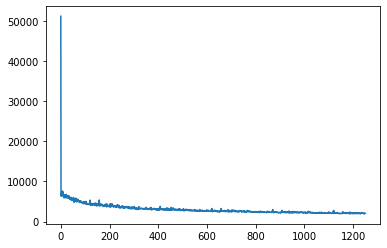

In [412]:
plt.plot(plotit)

In [413]:
acc(x,y_)

75.56

In [414]:
acc(test_x,test_y_)

58.835056422731256